In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

mystyle = r'https://gist.githubusercontent.com/mbolt01/3087dffd11e70eccb08fdcf327374a5c/raw/std_fig'
plt.style.use(mystyle)

In [5]:
## this is not needed as data now saved as a .pkl and csv after merge.
needed = False
if needed == True:
    ## import dose data
    #df = pd.read_csv(r'results-20170626-1017.csv',index_col=0)
    df = pd.read_csv(r'results-20180204-2124.csv',index_col=0) ##  this was a recheck of the results. All matches.
    df.head(3)

    ## import treatment type info.
    df_info = pd.read_excel(r'Treatment_side.xlsx',parse_cols=3)
    df_info.head(3)

    ## merge them...
    df = df.merge(df_info,left_on='patient_id', right_on='id', how='outer')

    ## save merged data
    #df.to_pickle('parsport_dose_data.pkl')
    #df.to_csv('parsport_dose_data.csv')
else:
    print('using merged file')
    df = pd.read_csv(r'parsport_dose_data-edit.csv',index_col=0)
    #df = pd.read_pickle(r'parsport_dose_data.pkl')
    
    
print(len(df))
df.head(3)

using merged file
2248


,sub_dir,patient_id,plan_name,struct_label,structure,v107,v103,d5cc,v99,v105,...,d99_val,d99_unit,d0.1cc_val,d0.1cc_unit,d2cc_val,d2cc_unit,id,Type,Side,side_full
2260,4004,4004,1 + 2 + 3 + 4 +,NaN,l hippocampus,"(0.0, 'cm3')","(0.0, 'cm3')","(0.0, 'Gy')","(0.0, 'cm3')","(0.0, 'cm3')",...,0.0,Gy,4.28,Gy,0.0,Gy,4004,Conformal,r,right
2265,4004,4004,1 + 2 + 3 + 4 +,NaN,r hippocampus,"(0.0, 'cm3')","(0.0, 'cm3')","(0.0, 'Gy')","(0.0, 'cm3')","(0.0, 'cm3')",...,0.0,Gy,4.29,Gy,0.0,Gy,4004,Conformal,r,right
2297,4005,4005,dosecube 1 + 2 +,NaN,l hippocampus,"(0.0, 'cm3')","(0.0, 'cm3')","(0.0, 'Gy')","(0.0, 'cm3')","(0.0, 'cm3')",...,0.0,Gy,5.72,Gy,0.0,Gy,4005,Conformal,r,right


In [6]:
## remove pt. 1502 from the analysis
#print(len(df))
#df = df[df['patient_id']!=1502]
#print(len(df))

In [7]:
df.columns

Index(['sub_dir', 'patient_id', 'plan_name', 'struct_label', 'structure',
       'v107', 'v103', 'd5cc', 'v99', 'v105', 'min', 'd0.2cc', 'd0.5cc', 'v93',
       'v98', 'd90', 'max', 'd95', 'd100', 'v95', 'mean', 'd1cc', 'median',
       'v100', 'v90', 'd98', 'volume', 'd99', 'd0.1cc', 'd2cc', 'v107_val',
       'v107_unit', 'v103_val', 'v103_unit', 'd5cc_val', 'd5cc_unit',
       'v99_val', 'v99_unit', 'v105_val', 'v105_unit', 'min_val', 'min_unit',
       'd0.2cc_val', 'd0.2cc_unit', 'd0.5cc_val', 'd0.5cc_unit', 'v93_val',
       'v93_unit', 'v98_val', 'v98_unit', 'd90_val', 'd90_unit', 'max_val',
       'max_unit', 'd95_val', 'd95_unit', 'd100_val', 'd100_unit', 'v95_val',
       'v95_unit', 'mean_val', 'mean_unit', 'd1cc_val', 'd1cc_unit',
       'median_val', 'median_unit', 'v100_val', 'v100_unit', 'v90_val',
       'v90_unit', 'd98_val', 'd98_unit', 'volume_val', 'volume_unit',
       'd99_val', 'd99_unit', 'd0.1cc_val', 'd0.1cc_unit', 'd2cc_val',
       'd2cc_unit', 'id', 'Type',

In [8]:
## show structures:
for structure in df['struct_label'].unique():
    print(structure)

nan
cord
r_parotid
l_parotid
ptv2
pharynx
ptv3
ptv1


In [16]:
the_vals_c = df[(df['struct_label']=='ptv1') & (df['Type']=='Conformal')]['mean_val'].tolist()
the_vals_i = df[(df['struct_label']=='ptv1') & (df['Type']=='IMRT')]['mean_val'].tolist()
print(np.std(the_vals_c))
print(np.std(the_vals_i))

1.26894140307
0.35233457723


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


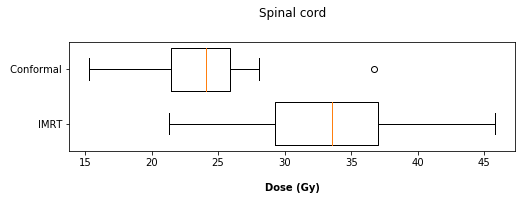

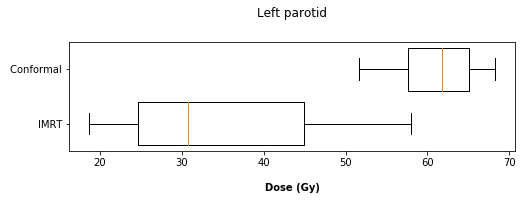

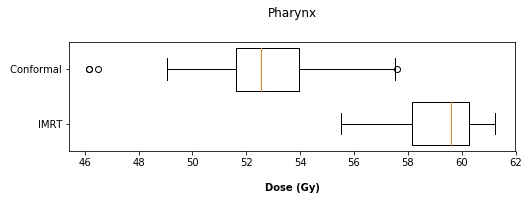

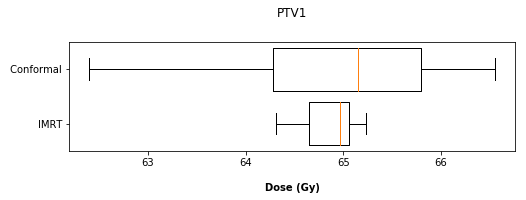

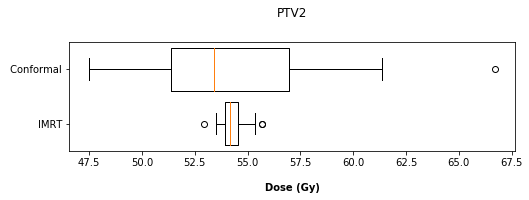

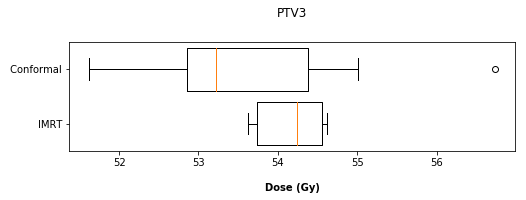

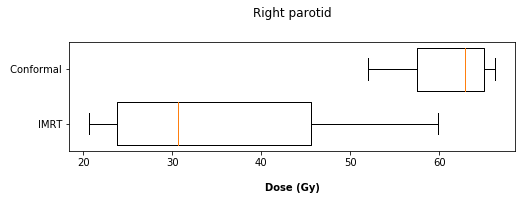

In [17]:
## plot of PTV1 mean SDs for imrt and conformal:

my_structs = ['ptv1','l_parotid']
my_structs = sorted(df['struct_label'].dropna().unique())
my_param = 'mean'

## auto create the correct lookup from the above specification
my_val = my_param + '_val'

## dict for formatted titles/structure names

struct_names = {'cord':'Spinal cord',
               'l_parotid':'Left parotid',
               'r_parotid':'Right parotid',
               'pharynx':'Pharynx',
               'ptv1':'PTV1',
               'ptv2':'PTV2',
               'ptv3':'PTV3'}

all_sds = {}

## box plots for each structure
for my_struct in my_structs:

    #data = df[df['struct_label']==my_struct] ## get the required rows

    imrt = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='IMRT')][my_val].dropna().tolist())[1:-1]
    conf = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='Conformal')][my_val].dropna().tolist())[1:-1]
    
    imrt_sd = np.std(imrt)
    conf_sd = np.std(conf)
    
    ## save each SD
    all_sds[my_struct] = {'imrt':imrt_sd,
                         'conf':conf_sd}

    plt.figure(figsize = (8,2))
    plt.boxplot([imrt,conf],labels=['IMRT', ' Conformal'],vert=False,widths=0.8)
    #plt.xlim(60,70)
    plt.legend()
    plt.title(struct_names[my_struct])
    plt.xlabel('Dose (Gy)')
    #plt.savefig('boxplot-' + my_struct + '-mean.png', dpi=300, bbox_inches='tight')
    plt.show()

Ttest_indResult(statistic=-10.381471665139037, pvalue=1.3768437570953331e-15)


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


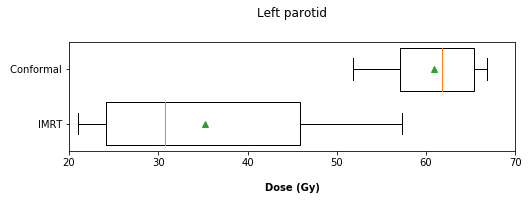

Ttest_indResult(statistic=-9.7225807488521792, pvalue=1.9788919606785361e-14)


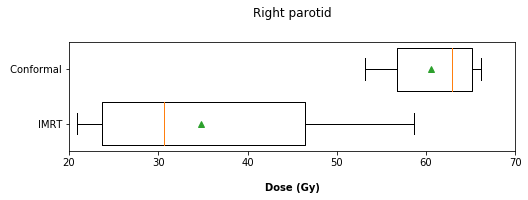

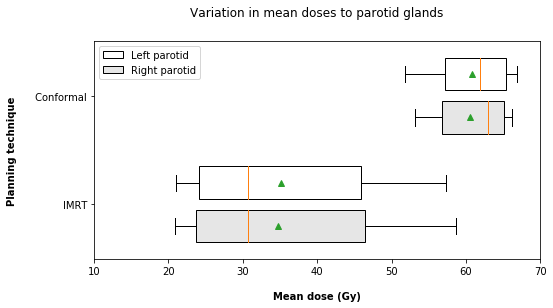


left_conf
mean 60.8775521303
median 61.83462138
sd 5.33664677305
5th perc 51.7357982425
95th perc 67.4915288325

left_imrt
mean 35.1962701968
median 30.72856928
sd 12.8653252946
5th perc 20.567729016
95th perc 57.475598036

right_conf
mean 60.5883196919
median 62.916237895
sd 7.46777384554
5th perc 52.6514059635
95th perc 66.2229051315

right_imrt
mean 34.7860493343
median 30.66945175
sd 13.0617527024
5th perc 20.892811568
95th perc 58.836722288


In [19]:
## produce a plto of l/r parotid on the same graph for thesis.
## ideally shade in the IMRT plot to differentiate it

both = []

for my_struct in ['l_parotid','r_parotid']:

    #data = df[df['struct_label']==my_struct] ## get the required rows

    imrt = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='IMRT')][my_val].dropna().tolist())#[1:-1]
    conf = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='Conformal')][my_val].dropna().tolist())#[1:-1]
    
    imrt_sd = np.std(imrt)
    conf_sd = np.std(conf)
    
    ## save each SD
    all_sds[my_struct] = {'imrt':imrt_sd,
                         'conf':conf_sd}
    
    print(stats.ttest_ind(imrt,conf))
    
    both.append([imrt,conf])

    plt.figure(figsize = (8,2))
    plt.boxplot([imrt,conf],labels=['IMRT', ' Conformal'],vert=False,widths=0.8,whis=[5,95],sym='',showmeans=True)
    plt.xlim(20,70)
    plt.legend()
    plt.title(struct_names[my_struct])
    plt.xlabel('Dose (Gy)')
    #plt.savefig('boxplot-' + my_struct + '-mean.png', dpi=300, bbox_inches='tight')
    plt.show()

    
## combined plot - uses ax. so can get auto legend from colour of boxplots
fig, ax = plt.subplots(figsize=(8, 4))

offset = 0.2
width = 0.3
## left
bp1 = ax.boxplot(both[0],labels=['IMRT', ' Conformal'],vert=False,widths=width,whis=[5,95],sym='',showmeans=True,
            positions=[1+offset,2+offset], patch_artist=True,boxprops={'facecolor':'white'})
## right
bp2 = ax.boxplot(both[1],labels=['IMRT', ' Conformal'],vert=False,widths=width,whis=[5,95],sym='',showmeans=True,
           positions=[1-offset,2-offset], patch_artist=True,boxprops={'facecolor':'#E6E6E6','alpha':1,'edgecolor':'black'})
ax.set_xlim(10,70)
plt.yticks([1,2],['IMRT', ' Conformal'])
plt.ylim(0.5,2.5)
ax.set_ylabel('Planning technique')
ax.set_xlabel('Mean dose (Gy)')
plt.title('Variation in mean doses to parotid glands')



## add legend key... need to add shaded box?
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Left parotid', 'Right parotid'])


plt.legend()

#plt.savefig('parotid_mean_doses-EDIT2.png',dpi=300,bbox_inches='tight')
plt.show()

## show actual stats - get from the plot...

## both[0] = left
## both[1] = right
## both[x][0] = imrt
## both[x][1] = conf

left_imrt = both[0][0]
left_conf = both[0][1]
right_imrt = both[1][0]
right_conf = both[1][1]

organ_vals = {'left_imrt':left_imrt,
             'left_conf':left_conf,
             'right_imrt':right_imrt,
             'right_conf':right_conf}


for organ in sorted(organ_vals):
    print('')
    print(organ)
    print('mean',np.mean(organ_vals[organ]))
    print('median',np.median(organ_vals[organ]))
    print('sd',np.std(organ_vals[organ]))
    print('5th perc', np.percentile(organ_vals[organ],5))
    print('95th perc', np.percentile(organ_vals[organ],95))


## this is how could access values from the plot itself
#print('mean imrt left',bp1['means'][0].get_xdata())
#print('mean conf left',bp1['means'][1].get_xdata())
#print('mean imrt right',bp2['means'][0].get_xdata())
#print('mean conf right',bp2['means'][1].get_xdata())

## the left and right are remarkably similar!!

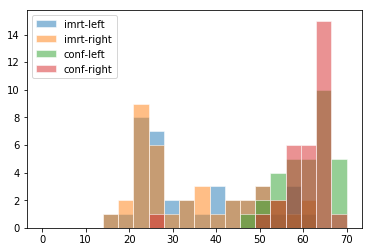

imrt-left NormaltestResult(statistic=7.772685560067238, pvalue=0.020520256063412543)
imrt-right NormaltestResult(statistic=7.2651990258044865, pvalue=0.026447344758949252)
conf-left NormaltestResult(statistic=2.5128340826557132, pvalue=0.28467217004782458)
conf-right NormaltestResult(statistic=47.304218782959744, pvalue=5.3458824627349398e-11)


In [20]:
## check if parotid doses are 'normal'
## Probably skewed in some way...

plt.hist(both[0][0],alpha=0.5,label='imrt-left',range=(0,70),bins=20,edgecolor='white')
plt.hist(both[1][0],alpha=0.5,label='imrt-right',range=(0,70),bins=20,edgecolor='white')
plt.hist(both[0][1],alpha=0.5,label='conf-left',range=(0,70),bins=20,edgecolor='white')
plt.hist(both[1][1],alpha=0.5,label='conf-right',range=(0,70),bins=20,edgecolor='white')
plt.legend()
plt.show()

print('imrt-left',stats.normaltest(both[0][0]))
print('imrt-right',stats.normaltest(both[1][0]))
print('conf-left',stats.normaltest(both[0][1]))
print('conf-right',stats.normaltest(both[1][1]))

## all are seen to be normally distributed, and so the Bartlett test is ok to use when comparing SDs.

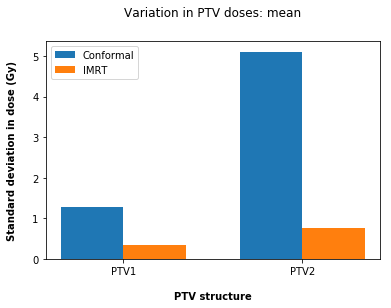

BartlettResult(statistic=95.015693590666473, pvalue=1.8888190853111626e-22)
LeveneResult(statistic=28.446627296156809, pvalue=9.8274551572148188e-07)


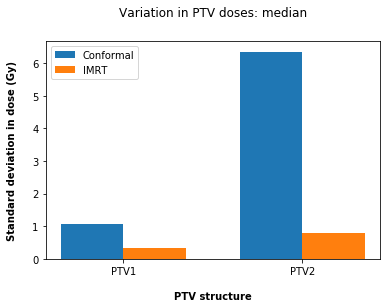

BartlettResult(statistic=107.3867896609714, pvalue=3.6623970502159784e-25)
LeveneResult(statistic=19.712064834744133, pvalue=3.0482760127301665e-05)


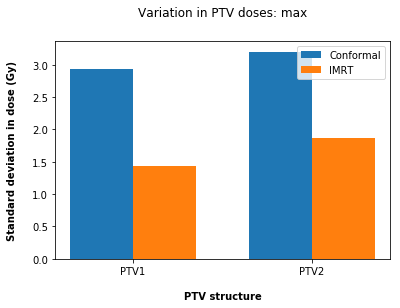

BartlettResult(statistic=10.503244287215523, pvalue=0.0011916513181868824)
LeveneResult(statistic=2.2737698676621387, pvalue=0.13578050700696809)


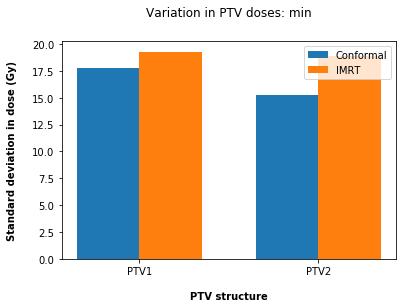

BartlettResult(statistic=1.661438706231686, pvalue=0.19740918455300094)
LeveneResult(statistic=2.6421155483837166, pvalue=0.10826002326675724)


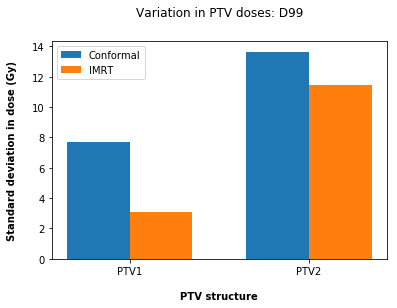

BartlettResult(statistic=1.1203104475816623, pvalue=0.28985161637615786)
LeveneResult(statistic=2.5189599690375686, pvalue=0.11669209312225194)


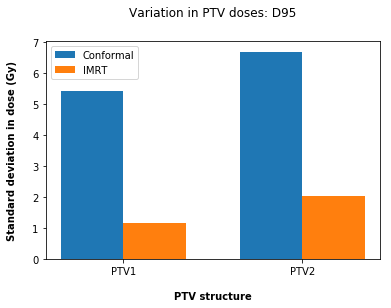

BartlettResult(statistic=44.849697924949311, pvalue=2.127536898995359e-11)
LeveneResult(statistic=14.376500715250121, pvalue=0.00030060572266952439)


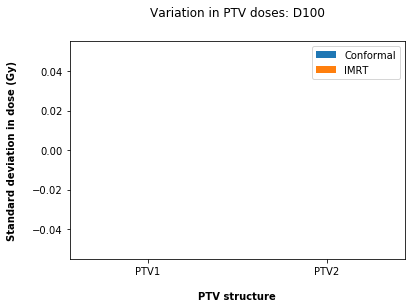

BartlettResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)


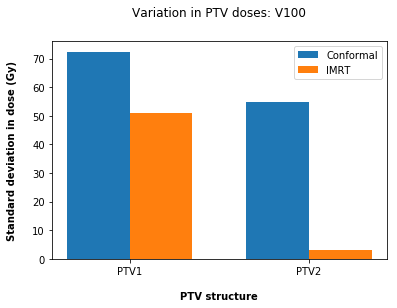

BartlettResult(statistic=167.71924229842088, pvalue=2.3298394276165116e-38)
LeveneResult(statistic=21.06893800609474, pvalue=1.7464772020023526e-05)


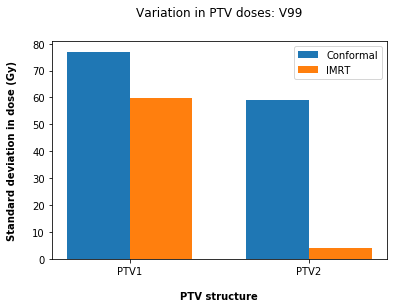

BartlettResult(statistic=151.75898673525526, pvalue=7.1532191992752104e-35)
LeveneResult(statistic=19.526631619897923, pvalue=3.2917847069597282e-05)


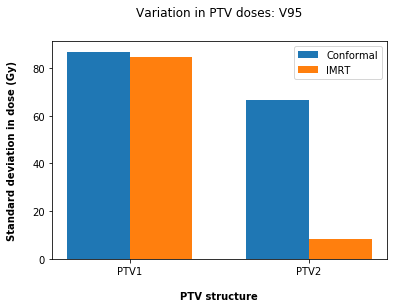

BartlettResult(statistic=108.32434243746145, pvalue=2.2820455479743129e-25)
LeveneResult(statistic=25.163491320939439, pvalue=3.4329030306140531e-06)


In [21]:
## bar plot of SDs for each structure in list
bar_structs = ['ptv1','ptv2']#,'l_parotid','r_parotid','cord'] ## ordered as want in plot

bar_labels = [struct_names[i] for i in bar_structs] ## create list of labels in same order


my_param = 'mean'

for my_param in ['mean','median','max','min','D99','D95','D100','V100','V99','V95']:

    ## auto create the correct lookup from the above specification
    my_val = my_param.lower() + '_val'

    ## get all the mean values and calc SDS.
    all_sds = {}

    for my_struct in bar_structs:

        #data = df[df['struct_label']==my_struct] ## get the required rows

        imrt = df[(df['struct_label']==my_struct) & (df['Type']=='IMRT')][my_val].dropna().tolist()#[1:-1]
        conf = df[(df['struct_label']==my_struct) & (df['Type']=='Conformal')][my_val].dropna().tolist()#[1:-1]

        imrt_sd = np.std(imrt)
        conf_sd = np.std(conf)

        ## save each SD
        all_sds[my_struct] = {'imrt':imrt_sd,
                             'conf':conf_sd}

    ## get sds from above into 2 lists of values in desired order
    imrt_sds = []
    conf_sds = []

    for struct in bar_structs:
        imrt_sd = all_sds[struct]['imrt']
        conf_sd = all_sds[struct]['conf']

        imrt_sds.append(imrt_sd)
        conf_sds.append(conf_sd)

    imrt_sds_perc = imrt_sds#[100*i/65 for i in imrt_sds]
    conf_sds_perc = conf_sds#[100*i/65 for i in conf_sds]

    w = 0.35
    offset = w
    the_left = [i for i in range(len(bar_structs))]
    the_left1 = [i-offset/2 for i in the_left]
    the_left2 = [i+offset/2 for i in the_left]

    plt.bar(left=the_left1,height=conf_sds_perc,alpha=1,width=w,label='Conformal')
    plt.bar(left=the_left2,height=imrt_sds_perc,alpha=1,width=w,label='IMRT')

    plt.xticks(the_left,bar_labels)
    plt.title('Variation in PTV doses: ' + my_param)
    plt.legend()
    plt.xlabel('PTV structure')
    plt.ylabel('Standard deviation in dose (Gy)')
    #plt.yticks([0,1,2,3,4,5])
    #plt.ylim(0,10)

    #plt.savefig('PTV-SD-var-abs-ptv1+2only-'+my_param+'.png',dpi=300, bbox_inches='tight')

    plt.show()

## statistical comparison
## need to use the raw values

## used bartlett test . could have used Levene which is more robust if non-normal
    print(stats.bartlett(imrt,conf))
    print(stats.levene(imrt,conf))

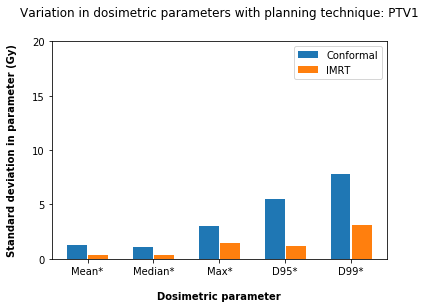

{'Max': {'imrt': 1.453813676627513, 'sig': LeveneResult(statistic=4.8776537882158415, pvalue=0.030684490293241766), 'conf': 2.989723780935344}, 'D95': {'imrt': 1.1635646856869526, 'sig': LeveneResult(statistic=38.375256361407757, pvalue=4.2525122238422064e-08), 'conf': 5.510469278871547}, 'D99': {'imrt': 3.1499797303454677, 'sig': LeveneResult(statistic=17.430839136228922, pvalue=8.915427389681199e-05), 'conf': 7.823215805815077}, 'Median': {'imrt': 0.3309911762119336, 'sig': LeveneResult(statistic=14.16399647449726, pvalue=0.00035859987590843657), 'conf': 1.0772964499751365}, 'Mean': {'imrt': 0.357332480441052, 'sig': LeveneResult(statistic=24.881600528487972, pvalue=4.6933973477092779e-06), 'conf': 1.2892457547623177}}


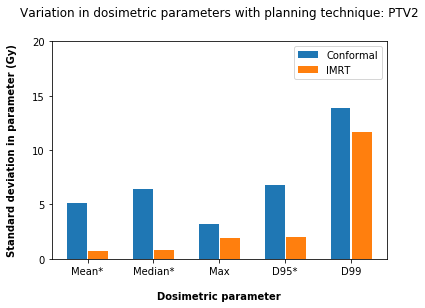

{'Max': {'imrt': 1.888208960079121, 'sig': LeveneResult(statistic=2.2737698676621387, pvalue=0.13578050700696809), 'conf': 3.2466967967597604}, 'D95': {'imrt': 2.0486911237453103, 'sig': LeveneResult(statistic=14.376500715250121, pvalue=0.00030060572266952439), 'conf': 6.787779814107467}, 'D99': {'imrt': 11.62545339341929, 'sig': LeveneResult(statistic=2.5189599690375686, pvalue=0.11669209312225194), 'conf': 13.837274430452828}, 'Median': {'imrt': 0.8001972513234722, 'sig': LeveneResult(statistic=19.712064834744133, pvalue=3.0482760127301665e-05), 'conf': 6.436770600679021}, 'Mean': {'imrt': 0.7603656181711705, 'sig': LeveneResult(statistic=28.446627296156809, pvalue=9.8274551572148188e-07), 'conf': 5.175767703964717}}


In [58]:
## Include multiple plots from above into a single figure.

## can just loop through and set the positions of each set of data based on number in loop?
## get the individual data points into dict, then plot using these

## just do for PTV1 as is the primary target and highest dose. Most time will be spent conforming this
## and can then fit more on plot

## do for these params (4 is max can reasonably fit into single plot without looking messy)
my_params = ['Mean','Median','Max','D95', 'D99']
my_structs = ['PTV1','PTV2']
my_labels = my_params

for my_struct in my_structs:

    plot_data = {}
    ## get the data
    for my_param in my_params:

        my_val = my_param.lower() + '_val' ## lookup column


        ## get the data
        data = df[df['struct_label']==my_struct.lower()]

        imrt = data[data['Type']=='IMRT'][my_val].dropna()
        conf = data[data['Type']=='Conformal'][my_val].dropna()



        ## get comparison results t-test for use
        #signif = stats.bartlett(imrt.tolist(),conf.tolist())
        signif = stats.levene(imrt.tolist(),conf.tolist())

        ## store the SDs
        plot_data[my_param] = {'imrt':imrt.std(),
                               'conf':conf.std(),
                               'sig':signif}

    my_width = 0.3
    my_offset = 0.16

    pval_test = 0.05

    include_signif = True

    params = []
    imrts = []
    confs = []
    signif = []
    posns = [i for i in range(len(plot_data))]
    for param in my_params:
        params.append(param)
        imrts.append(plot_data[param]['imrt'])
        confs.append(plot_data[param]['conf'])
        if plot_data[param]['sig'].pvalue <=pval_test:
            if include_signif == True:
                signif.append('*')
            else:
                signif.append('')
        else:
            signif.append('')

    plot_labels = [my_params[i]+signif[i] for i in range(len(my_params))]

    plt.bar(left=[i-my_offset for i in posns],height=confs,alpha=1,width=my_width,label='Conformal')
    plt.bar(left=[i+my_offset for i in posns],height=imrts,alpha=1,width=my_width,label='IMRT')
    plt.legend()
    plt.xticks(posns,plot_labels)
    plt.yticks([0,5,10,15,20])

    plt.xlabel('Dosimetric parameter')
    plt.ylabel('Standard deviation in parameter (Gy)')
    plt.title('Variation in dosimetric parameters with planning technique: ' + my_struct)

    #plt.savefig('multi_stats-imrtVconf-' + my_struct + '.png',dpi=300,bbox_inches='tight')

    plt.show()

    print(plot_data)
    


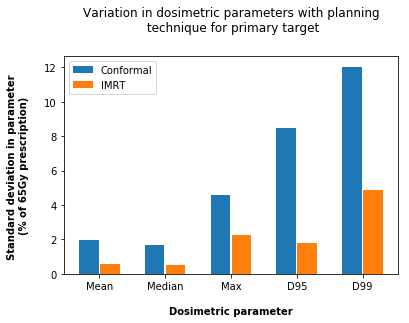

{'Max': {'imrt': 1.453813676627513, 'sig': LeveneResult(statistic=4.8776537882158415, pvalue=0.030684490293241766), 'conf': 2.989723780935344}, 'D95': {'imrt': 1.1635646856869526, 'sig': LeveneResult(statistic=38.375256361407757, pvalue=4.2525122238422064e-08), 'conf': 5.510469278871547}, 'D99': {'imrt': 3.1499797303454677, 'sig': LeveneResult(statistic=17.430839136228922, pvalue=8.915427389681199e-05), 'conf': 7.823215805815077}, 'Median': {'imrt': 0.3309911762119336, 'sig': LeveneResult(statistic=14.16399647449726, pvalue=0.00035859987590843657), 'conf': 1.0772964499751365}, 'Mean': {'imrt': 0.357332480441052, 'sig': LeveneResult(statistic=24.881600528487972, pvalue=4.6933973477092779e-06), 'conf': 1.2892457547623177}}
---Numberical data for PTV1---: Mean
sd conf: 1.9834550073266428
sd imrt: 0.5497422776016184
---Numberical data for PTV1---: Median
sd conf: 1.6573791538079021
sd imrt: 0.5092171941722055
---Numberical data for PTV1---: Max
sd conf: 4.599575047592837
sd imrt: 2.2366364

In [59]:
## same as above, but convert Gy to % of 65Gy.

## Include multiple plots from above into a single figure.

## can just loop through and set the positions of each set of data based on number in loop?
## get the individual data points into dict, then plot using these

## just do for PTV1 as is the primary target and highest dose. Most time will be spent conforming this
## and can then fit more on plot

## do for these params (4 is max can reasonably fit into single plot without looking messy)
my_params = ['Mean','Median','Max','D95', 'D99']
my_structs = ['PTV1']#,'PTV2']
my_labels = my_params

for my_struct in my_structs:

    plot_data = {}
    ## get the data
    for my_param in my_params:

        my_val = my_param.lower() + '_val' ## lookup column


        ## get the data
        data = df[df['struct_label']==my_struct.lower()]

        imrt = data[data['Type']=='IMRT'][my_val].dropna()
        conf = data[data['Type']=='Conformal'][my_val].dropna()



        ## get comparison results t-test for use
        #signif = stats.bartlett(imrt.tolist(),conf.tolist())
        signif = stats.levene(imrt.tolist(),conf.tolist())

        ## store the SDs
        plot_data[my_param] = {'imrt':imrt.std(),
                               'conf':conf.std(),
                               'sig':signif}

    my_width = 0.3
    my_offset = 0.16

    pval_test = 0.05

    include_signif = False

    params = []
    imrts = []
    confs = []
    signif = []
    posns = [i for i in range(len(plot_data))]
    for param in my_params:
        params.append(param)
        imrts.append(plot_data[param]['imrt'])
        confs.append(plot_data[param]['conf'])
        if plot_data[param]['sig'].pvalue <=pval_test:
            if include_signif == True:
                signif.append('*')
            else:
                signif.append('')
        else:
            signif.append('')
            
    ## conver to perc
    imrts_perc = [100*i/65 for i in imrts]
    confs_perc = [100*i/65 for i in confs]

    plot_labels = [my_params[i]+signif[i] for i in range(len(my_params))]

    #plt.bar(left=[i-my_offset for i in posns],height=confs,alpha=1,width=my_width,label='Conformal')
    #plt.bar(left=[i+my_offset for i in posns],height=imrts,alpha=1,width=my_width,label='IMRT')
    plt.bar(left=[i-my_offset for i in posns],height=confs_perc,alpha=1,width=my_width,label='Conformal')
    plt.bar(left=[i+my_offset for i in posns],height=imrts_perc,alpha=1,width=my_width,label='IMRT')
    plt.legend()
    plt.xticks(posns,plot_labels)
    #plt.yticks([0,5,10,15,20])

    plt.xlabel('Dosimetric parameter')
    plt.ylabel('Standard deviation in parameter \n(% of 65Gy prescription)')
    plt.title('Variation in dosimetric parameters with planning\n technique for primary target')

    #plt.savefig('multi_stats-imrtVconf-' + my_struct + '-EDIT2.png',dpi=300,bbox_inches='tight')

    plt.show()

    print(plot_data)
## stats from above.

for i in range(len(my_params)):
    print('---Numberical data for PTV1---:',my_params[i])
    print('sd conf:',confs_perc[i])
    print('sd imrt:',imrts_perc[i])

In [23]:
df.columns

Index(['sub_dir', 'patient_id', 'plan_name', 'struct_label', 'structure',
       'v107', 'v103', 'd5cc', 'v99', 'v105', 'min', 'd0.2cc', 'd0.5cc', 'v93',
       'v98', 'd90', 'max', 'd95', 'd100', 'v95', 'mean', 'd1cc', 'median',
       'v100', 'v90', 'd98', 'volume', 'd99', 'd0.1cc', 'd2cc', 'v107_val',
       'v107_unit', 'v103_val', 'v103_unit', 'd5cc_val', 'd5cc_unit',
       'v99_val', 'v99_unit', 'v105_val', 'v105_unit', 'min_val', 'min_unit',
       'd0.2cc_val', 'd0.2cc_unit', 'd0.5cc_val', 'd0.5cc_unit', 'v93_val',
       'v93_unit', 'v98_val', 'v98_unit', 'd90_val', 'd90_unit', 'max_val',
       'max_unit', 'd95_val', 'd95_unit', 'd100_val', 'd100_unit', 'v95_val',
       'v95_unit', 'mean_val', 'mean_unit', 'd1cc_val', 'd1cc_unit',
       'median_val', 'median_unit', 'v100_val', 'v100_unit', 'v90_val',
       'v90_unit', 'd98_val', 'd98_unit', 'volume_val', 'volume_unit',
       'd99_val', 'd99_unit', 'd0.1cc_val', 'd0.1cc_unit', 'd2cc_val',
       'd2cc_unit', 'id', 'Type',

ptv1 Ttest_indResult(statistic=-0.11065016063754247, pvalue=0.91222956012159129)
ptv1 imrt NormaltestResult(statistic=13.026174776090112, pvalue=0.0014838912953303324)
ptv1 conf NormaltestResult(statistic=13.026174776090112, pvalue=0.0014838912953303324)
ptv2 Ttest_indResult(statistic=-0.224711030751194, pvalue=0.82281517828824047)
ptv2 imrt NormaltestResult(statistic=13.546486376932986, pvalue=0.0011439784902086143)
ptv2 conf NormaltestResult(statistic=13.546486376932986, pvalue=0.0011439784902086143)


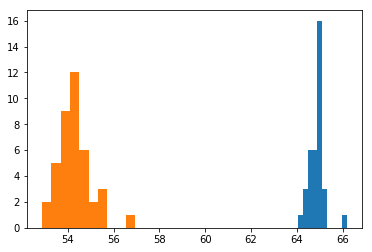

In [24]:
## get the PTV doses and test for normality...

my_param = 'mean'

## auto create the correct lookup from the above specification
my_val = my_param + '_val'

all_ptv_data = {}
for my_struct in ['ptv1','ptv2']:

    #data = df[df['struct_label']==my_struct] ## get the required rows

    imrt = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='IMRT')][my_val].dropna().tolist())#[1:-1]
    conf = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='Conformal')][my_val].dropna().tolist())#[1:-1]
    
    ## save the data for each structure
    all_ptv_data[my_struct] = {'imrt':imrt,
                               'conf':conf}
    
    print(my_struct,stats.ttest_ind(imrt,conf)) ##  this indicates the mean of the data does not differ significantly
    
    print(my_struct,'imrt',stats.normaltest(imrt))
    print(my_struct,'conf',stats.normaltest(imrt)) ##  all but ptv3 are non-normally distributed...
    ## so lets look at the SDs
    
plt.hist(all_ptv_data['ptv1']['imrt'])
plt.hist(all_ptv_data['ptv2']['imrt'])
#plt.hist(all_ptv_data['ptv3']['imrt'])
plt.show()

In [25]:
all_sds

{'ptv1': {'conf': 86.866533742180295, 'imrt': 84.561499866307955},
 'ptv2': {'conf': 66.768003747880002, 'imrt': 8.2051892230999162}}

ptv1
ptv2
ptv3
pharynx
l_parotid
r_parotid
cord


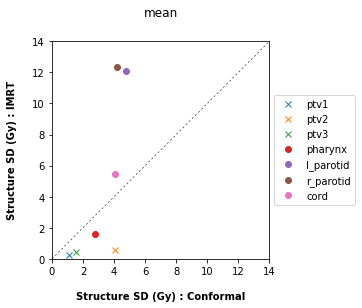

In [26]:
struct_info = {'cord':{'type':'OAR'},
               'l_parotid':{'type':'OAR'},
                'pharynx':{'type':'OAR'},
                'ptv1':{'type':'PTV'},
                'ptv2':{'type':'PTV'},
                'ptv3':{'type':'PTV'},
                'r_parotid':{'type':'OAR'}
               }

## get all the mean values and calc SDS.
my_structs = ['ptv1','l_parotid']
my_structs = sorted(df['struct_label'].dropna().unique())
my_param = 'mean'

## auto create the correct lookup from the above specification
my_val = my_param + '_val'

## dict for formatted titles/structure names

struct_names = {'cord':'Spinal cord',
               'l_parotid':'Left parotid',
               'r_parotid':'Right parotid',
               'pharynx':'Pharynx',
               'ptv1':'PTV1',
               'ptv2':'PTV2',
               'ptv3':'PTV3'}

all_sds = {}

## box plots for each structure
for my_struct in my_structs:

    #data = df[df['struct_label']==my_struct] ## get the required rows

    imrt = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='IMRT')][my_val].dropna().tolist())[1:-1]
    conf = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='Conformal')][my_val].dropna().tolist())[1:-1]
    
    imrt_sd = np.std(imrt)
    conf_sd = np.std(conf)
    
    ## save each SD
    all_sds[my_struct] = {'imrt':imrt_sd,
                         'conf':conf_sd}


for struct in ['ptv1','ptv2','ptv3','pharynx','l_parotid','r_parotid','cord']: ## specify explicitely to order legend
    print(struct)
    if struct_info[struct]['type']=='PTV':
        marker = 'x'
    else:
        marker = 'o'
    plt.plot(all_sds[struct]['conf'],all_sds[struct]['imrt'],ls='',marker=marker,label=struct)
plt.xlabel('Structure SD (Gy) : Conformal')
plt.ylabel('Structure SD (Gy) : IMRT')
plt.axes().set_aspect('equal')
my_lim = 14
plt.xlim(0,my_lim)
plt.ylim(0,my_lim)
plt.plot([0,my_lim],[0,my_lim],ls=':',zorder=0,lw=0.5,c='black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(my_param)
plt.show()

## basically for PTVs the mean dose is much more consistent and so will directly relate to beam output/TCP etc.

## Get some simple info on number of patients included in analysis etc.

In [27]:
df.describe()

,sub_dir,patient_id,v107_val,v103_val,d5cc_val,v99_val,v105_val,min_val,d0.2cc_val,d0.5cc_val,...,d1cc_val,median_val,v100_val,v90_val,d98_val,volume_val,d99_val,d0.1cc_val,d2cc_val,id
count,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,...,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000
mean,1585.564947,1585.564947,1.098882,8.824882,45.974938,27.516076,3.403661,20.350027,54.161593,52.689471,...,51.439399,42.443759,23.087773,42.147329,26.932980,126.798276,25.308706,55.059956,49.744649,1585.564947
std,1236.379663,1236.379663,6.499491,27.251097,25.540187,67.878518,13.397907,20.987920,22.214187,23.121274,...,23.686447,23.452546,57.769437,103.623682,22.757456,468.118679,22.438037,21.708715,24.373067,1236.379663
min,1001.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,1001.000000
25%,1022.000000,1022.000000,0.000000,0.000000,30.982500,0.000000,0.000000,2.000000,47.350000,44.615000,...,42.785000,21.405000,0.000000,0.000000,4.860000,9.904687,4.260000,49.232500,40.707500,1022.000000
50%,1045.000000,1045.000000,0.000000,0.000000,59.135000,0.789062,0.000000,10.690000,65.450000,64.800000,...,64.015000,51.610000,0.403125,5.471875,20.755000,25.630625,17.585000,65.860000,62.850000,1045.000000
75%,1066.000000,1066.000000,0.003214,4.642969,66.805000,14.978601,0.644452,40.507500,68.780000,68.335000,...,67.980000,64.362500,12.692786,26.950922,49.497500,139.008594,47.755000,69.020000,67.600000,1066.000000
max,6006.000000,6006.000000,178.064958,489.681215,82.460000,879.488068,289.000981,69.530000,83.030000,82.930000,...,82.830000,77.200000,783.484195,1700.042441,69.680000,11128.437000,69.530000,83.090000,82.690000,6006.000000


In [28]:
df.columns

Index(['sub_dir', 'patient_id', 'plan_name', 'struct_label', 'structure',
       'v107', 'v103', 'd5cc', 'v99', 'v105', 'min', 'd0.2cc', 'd0.5cc', 'v93',
       'v98', 'd90', 'max', 'd95', 'd100', 'v95', 'mean', 'd1cc', 'median',
       'v100', 'v90', 'd98', 'volume', 'd99', 'd0.1cc', 'd2cc', 'v107_val',
       'v107_unit', 'v103_val', 'v103_unit', 'd5cc_val', 'd5cc_unit',
       'v99_val', 'v99_unit', 'v105_val', 'v105_unit', 'min_val', 'min_unit',
       'd0.2cc_val', 'd0.2cc_unit', 'd0.5cc_val', 'd0.5cc_unit', 'v93_val',
       'v93_unit', 'v98_val', 'v98_unit', 'd90_val', 'd90_unit', 'max_val',
       'max_unit', 'd95_val', 'd95_unit', 'd100_val', 'd100_unit', 'v95_val',
       'v95_unit', 'mean_val', 'mean_unit', 'd1cc_val', 'd1cc_unit',
       'median_val', 'median_unit', 'v100_val', 'v100_unit', 'v90_val',
       'v90_unit', 'd98_val', 'd98_unit', 'volume_val', 'volume_unit',
       'd99_val', 'd99_unit', 'd0.1cc_val', 'd0.1cc_unit', 'd2cc_val',
       'd2cc_unit', 'id', 'Type',

In [29]:
len(df[df['Type']=='Conformal']['patient_id'].unique())

32

In [30]:
len(df[df['Type']=='IMRT']['patient_id'].unique())

37

In [31]:
len(df['patient_id'].unique())

69

In [32]:
i_count = 0
c_count = 0

for patient in df['patient_id'].unique():
    the_t = df[df['patient_id']==patient]['Type'].unique()
    print(patient,df[df['patient_id']==patient]['Type'].unique())
    if the_t == ['IMRT']:
        i_count = i_count+1
    if the_t == ['Conformal']:
        c_count = c_count + 1
print('i',i_count)
print('c',c_count)

4004 ['Conformal']
4005 ['Conformal']
5002 ['Conformal']
1053 ['Conformal']
5001 ['Conformal']
1030 ['Conformal']
1041 ['IMRT']
2502 ['IMRT']
2503 ['IMRT']
1007 ['Conformal']
1005 ['Conformal']
1011 ['Conformal']
1013 ['Conformal']
1059 ['Conformal']
1503 ['IMRT']
1023 ['Conformal']
2501 ['Conformal']
1050 ['Conformal']
1038 ['Conformal']
1001 ['Conformal']
1032 ['Conformal']
1031 ['IMRT']
1037 ['Conformal']
1022 ['IMRT']
1062 ['IMRT']
1066 ['IMRT']
1061 ['Conformal']
1504 ['Conformal']
1054 ['IMRT']
1004 ['IMRT']
1019 ['IMRT']
1508 ['IMRT']
1012 ['IMRT']
4006 ['IMRT']
6005 ['Conformal']
1008 ['IMRT']
6003 ['IMRT']
1029 ['IMRT']
1017 ['IMRT']
1028 ['Conformal']
1055 ['IMRT']
1002 ['IMRT']
1043 ['IMRT']
1056 ['Conformal']
1045 ['Conformal']
1060 ['IMRT']
6001 ['Conformal']
1033 ['Conformal']
1049 ['IMRT']
1051 ['IMRT']
1048 ['IMRT']
1024 ['IMRT']
6002 ['IMRT']
1027 ['IMRT']
1505 ['IMRT']
1039 ['IMRT']
1065 ['IMRT']
4003 ['IMRT']
1035 ['IMRT']
1046 ['IMRT']
4002 ['Conformal']
1025 ['IMRT

In [33]:
imrt = df[df['Type']=='IMRT'].dropna()
cfrt = df[df['Type']=='Conformal'].dropna()

In [34]:
len(cfrt['patient_id'].unique())

32

In [35]:
for i in df['patient_id'].unique():
    print(i, df[df['patient_id']==i]['struct_label'].dropna().unique())

4004 ['cord' 'ptv2' 'r_parotid' 'l_parotid' 'ptv1']
4005 ['cord' 'ptv3' 'l_parotid' 'ptv2' 'ptv1' 'r_parotid']
5002 ['ptv2' 'l_parotid' 'r_parotid' 'ptv1' 'cord']
1053 ['ptv2' 'l_parotid' 'pharynx' 'r_parotid' 'ptv1' 'cord']
5001 ['ptv2' 'ptv1' 'l_parotid' 'r_parotid' 'cord']
1030 ['cord' 'ptv2' 'pharynx' 'r_parotid' 'ptv1' 'l_parotid']
1041 ['r_parotid' 'cord' 'l_parotid' 'ptv1']
2502 ['r_parotid' 'cord' 'l_parotid' 'ptv2' 'ptv1']
2503 ['cord' 'r_parotid' 'l_parotid' 'ptv2' 'ptv1']
1007 ['cord' 'ptv3' 'ptv2' 'pharynx' 'ptv1' 'r_parotid' 'l_parotid']
1005 ['ptv3' 'ptv2' 'l_parotid' 'pharynx' 'ptv1' 'r_parotid' 'cord']
1011 ['cord' 'ptv2' 'r_parotid' 'l_parotid' 'pharynx' 'ptv1']
1013 ['cord' 'ptv3' 'ptv2' 'pharynx' 'l_parotid' 'ptv1' 'r_parotid']
1059 ['ptv2' 'cord' 'pharynx' 'ptv1' 'l_parotid' 'r_parotid']
1503 ['l_parotid' 'cord' 'r_parotid' 'ptv2' 'ptv3' 'pharynx' 'ptv1']
1023 ['ptv2' 'l_parotid' 'cord' 'r_parotid' 'pharynx' 'ptv1']
2501 ['cord' 'r_parotid' 'ptv3' 'l_parotid' 'ptv2'